In [1]:
import torch
import numpy as np
from tqdm import tqdm
from scipy.stats.distributions import chi2
from scipy.stats import pearsonr
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random
import matplotlib.animation as animation
import sys, os

from utils.plots import *
from utils.funcs import *


from boltzmann_machines.RTRBM import RTRBM
from boltzmann_machines.RTRBM_no_bias import RTRBM_nobias
from boltzmann_machines.RBM import RBM

from data.load_data import *
from data.mock_data import *
from data.reshape_data import *


In [3]:
N_V = 20
N_H = 3
T = 30
n_batches = 100

generated = []
trained = []

for i in range(10):
    W = torch.randint(-1, 2, (N_H, N_V), dtype=torch.float)
    U = torch.randint(-1, 2, (N_H, N_H), dtype=torch.float)
    b_init = torch.zeros(1, N_H, dtype=torch.float)
    b_V = torch.zeros(1, N_V, dtype=torch.float)
    b_H = torch.zeros(1, N_H, dtype=torch.float)

    data = torch.zeros(N_V, T, dtype=torch.float)

    rtrbm = RTRBM(data, N_H=N_H, device='cpu')

    rtrbm.W = W
    rtrbm.U = U
    rtrbm.b_init = b_init
    rtrbm.b_V = b_V
    rtrbm.b_H = b_H

    data = torch.zeros(N_V, T, n_batches)
    rt = torch.zeros(N_H, T, n_batches)
    for batch in tqdm(range(n_batches)):
        v_start = (torch.rand(N_V) > 0.2)*1.0
        data[:, :, batch], rt[:, :, batch] = rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=100, gibbs_k=100, mode=1, disable_tqdm=True)

    rtrbm_nobias = RTRBM_nobias(data, N_H=N_H, device='cpu')
    rtrbm_nobias.learn(n_epochs=1000, batchsize=100, CDk=10, lr=1e-4)

    generated += [rtrbm]
    trained += [rtrbm_nobias]

100%|██████████| 1000/1000 [06:54<00:00,  2.42it/s]


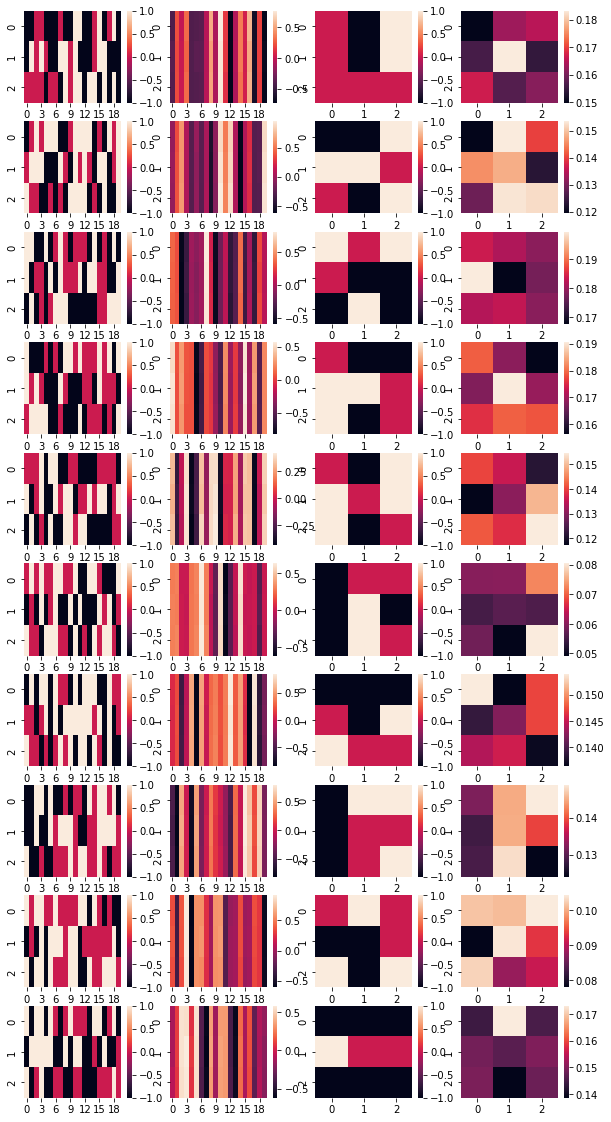

In [7]:
fig, axes = plt.subplots(10, 4, figsize=(10, 20))

for i, ax in enumerate(axes):
    sns.heatmap(generated[i].W, ax=ax[0])
    sns.heatmap(trained[i].W, ax=ax[1])
    sns.heatmap(generated[i].U, ax=ax[2])
    sns.heatmap(trained[i].U, ax=ax[3])

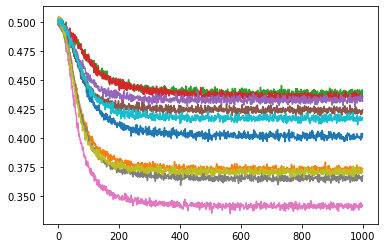

In [8]:
for tr in trained:
    plt.plot(tr.errors)

In [9]:
N_V = 20
N_H = 3
T = 30
n_batches = 100

generated1 = []
trained1 = []

for i in range(10):
    W = torch.randint(-1, 2, (N_H, N_V), dtype=torch.float)
    U = torch.randint(-1, 2, (N_H, N_H), dtype=torch.float)
    b_init = torch.zeros(1, N_H, dtype=torch.float)
    b_V = torch.zeros(1, N_V, dtype=torch.float)
    b_H = torch.zeros(1, N_H, dtype=torch.float)

    data = torch.zeros(N_V, T, dtype=torch.float)

    rtrbm = RTRBM(data, N_H=N_H, device='cpu')

    rtrbm.W = W
    rtrbm.U = U
    rtrbm.b_init = b_init
    rtrbm.b_V = b_V
    rtrbm.b_H = b_H

    data = torch.zeros(N_V, T, n_batches)
    rt = torch.zeros(N_H, T, n_batches)
    for batch in tqdm(range(n_batches)):
        v_start = (torch.rand(N_V) > 0.2)*1.0
        data[:, :, batch], rt[:, :, batch] = rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=100, gibbs_k=100, mode=1, disable_tqdm=True)

    rtrbm_nobias = RTRBM_nobias(data, N_H=N_H, device='cpu')
    rtrbm_nobias.learn(n_epochs=3000, batchsize=100, CDk=10, lr=1e-5, mom=0, wc=0)

    generated1 += [rtrbm]
    trained1 += [rtrbm_nobias]

 41%|████      | 1220/3000 [09:17<13:34,  2.19it/s]


KeyboardInterrupt: 

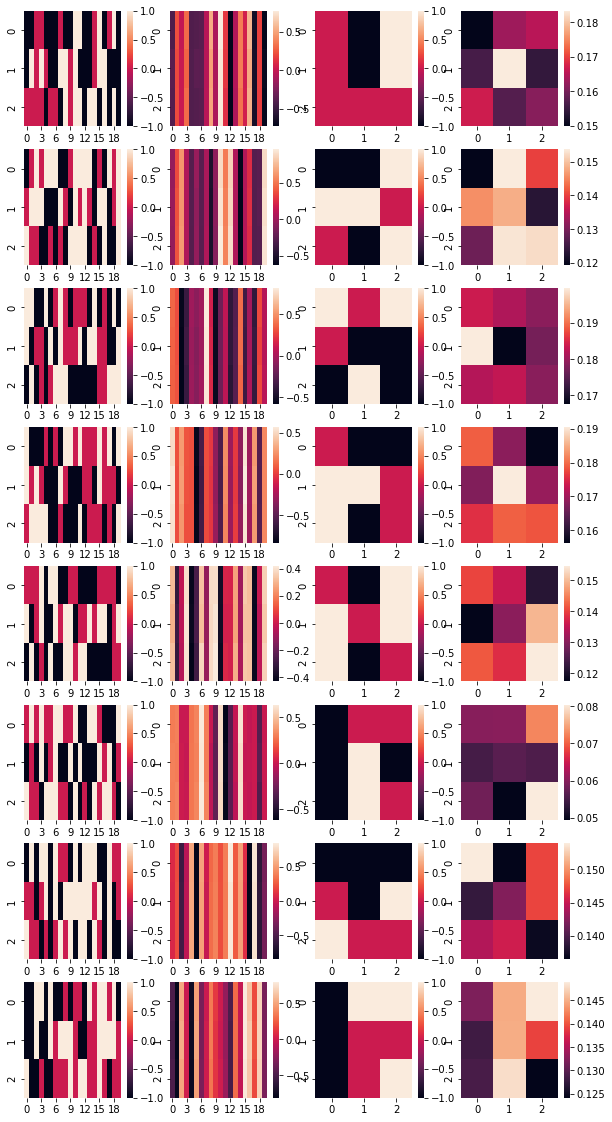

In [10]:
fig, axes = plt.subplots(8, 4, figsize=(10, 20))

for i, ax in enumerate(axes):
    sns.heatmap(generated[i].W, ax=ax[0])
    sns.heatmap(trained[i].W, ax=ax[1])
    sns.heatmap(generated[i].U, ax=ax[2])
    sns.heatmap(trained[i].U, ax=ax[3])

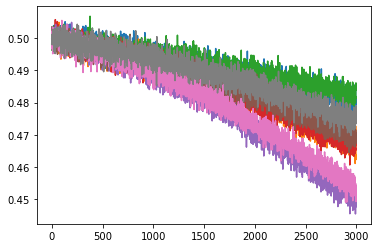

In [11]:
for tr in trained1:
    plt.plot(tr.errors)

In [12]:
N_V = 20
N_H = 3
T = 30
n_batches = 50


W = torch.randint(-1, 2, (N_H, N_V), dtype=torch.float)
U = torch.randint(-1, 2, (N_H, N_H), dtype=torch.float)
b_init = torch.zeros(1, N_H, dtype=torch.float)
b_V = torch.zeros(1, N_V, dtype=torch.float)
b_H = torch.zeros(1, N_H, dtype=torch.float)

data = torch.zeros(N_V, T, dtype=torch.float)

rtrbm = RTRBM(data, N_H=N_H, device='cpu')

rtrbm.W = W
rtrbm.U = U
rtrbm.b_init = b_init
rtrbm.b_V = b_V
rtrbm.b_H = b_H

data = torch.zeros(N_V, T, n_batches)
rt = torch.zeros(N_H, T, n_batches)
for batch in tqdm(range(n_batches)):
    v_start = (torch.rand(N_V) > 0.2)*1.0
    data[:, :, batch], rt[:, :, batch] = rtrbm.sample(v_start.type(torch.float), chain=T, pre_gibbs_k=100, gibbs_k=100, mode=1, disable_tqdm=True)

rtrbm_nobias = RTRBM_nobias(data, N_H=N_H, device='cpu')
rtrbm_nobias.learn(n_epochs=3000, batchsize=50, CDk=10, lr=1e-4, mom=0, wc=0)

100%|██████████| 3000/3000 [10:38<00:00,  4.70it/s]


<AxesSubplot:>

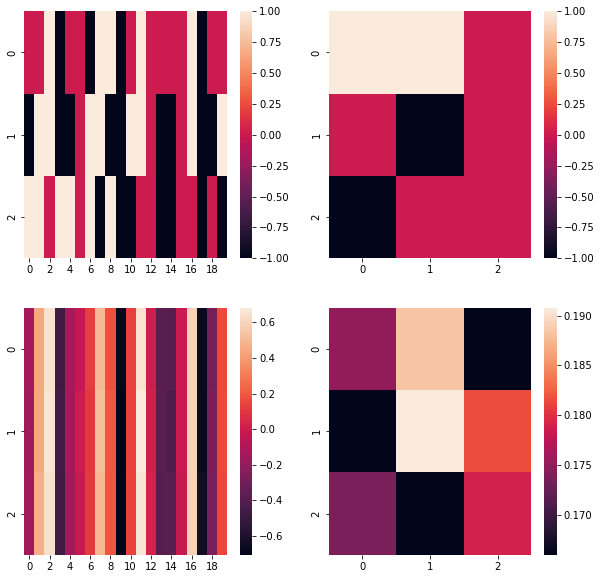

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(rtrbm.W, ax=axes[0, 0])
sns.heatmap(rtrbm_nobias.W, ax=axes[1, 0])
sns.heatmap(rtrbm.U, ax=axes[0, 1])
sns.heatmap(rtrbm_nobias.U, ax=axes[1, 1])

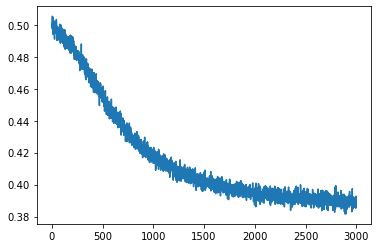

In [15]:
plt.plot(rtrbm_nobias.errors)

In [18]:
rtrbm_nobias.learn(n_epochs=1000, batchsize=50, CDk=10, lr=2e-4, mom=0, wc=0)

100%|██████████| 1000/1000 [03:32<00:00,  4.71it/s]


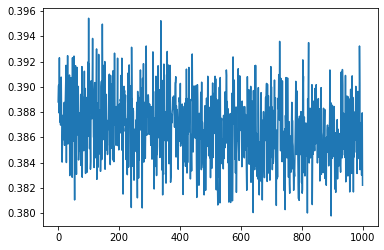

In [19]:
plt.plot(rtrbm_nobias.errors)

<AxesSubplot:>

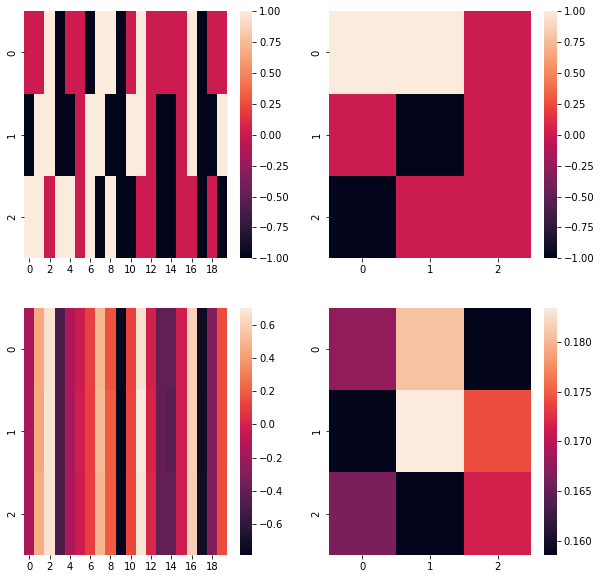

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(rtrbm.W, ax=axes[0, 0])
sns.heatmap(rtrbm_nobias.W, ax=axes[1, 0])
sns.heatmap(rtrbm.U, ax=axes[0, 1])
sns.heatmap(rtrbm_nobias.U, ax=axes[1, 1])

In [23]:
from data.mock_data import create_BB

data = create_BB(n_samples=100)

rtrbm_balls = RTRBM(data, N_H=3, device='cpu')
rtrbm_balls.learn(n_epochs=200, lr=1e-3, mom=0, wc=0, batchsize=20)

100%|██████████| 200/200 [02:21<00:00,  1.41it/s]


<AxesSubplot:title={'center':'Reconstruction error of RTRBM during training'}, xlabel='epochs', ylabel='normalised reconstruction error'>

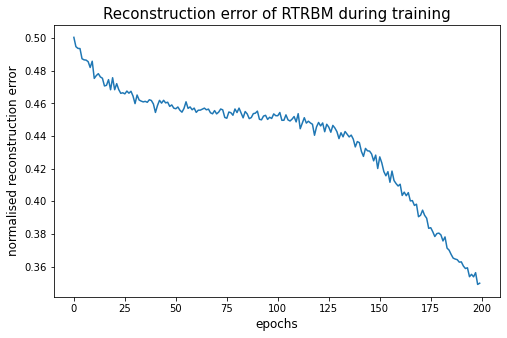

In [24]:
plot_reconstruction_error(rtrbm_balls.errors)

In [25]:
rtrbm_balls.learn(n_epochs=200, lr=1e-3, mom=0, wc=0, batchsize=20)

100%|██████████| 200/200 [02:27<00:00,  1.36it/s]


<AxesSubplot:title={'center':'Reconstruction error of RTRBM during training'}, xlabel='epochs', ylabel='normalised reconstruction error'>

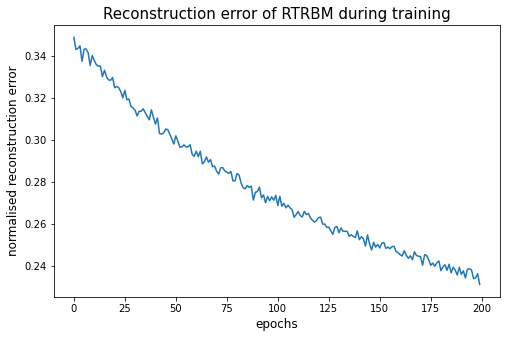

In [26]:
plot_reconstruction_error(rtrbm_balls.errors)

100%|██████████| 24/24 [00:00<00:00, 203.94it/s]


<AxesSubplot:>

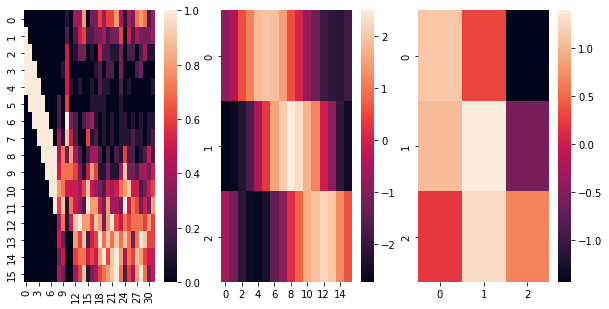

In [29]:
vt, rt = rtrbm_balls.infer(data[:, :8, 0])
fig, axes = plt.subplots(1, 3, figsize=(10,5))
sns.heatmap(vt, ax=axes[0])
sns.heatmap(rtrbm_balls.W, ax=axes[1])
sns.heatmap(rtrbm_balls.U, ax=axes[2])

In [30]:
gen = torch.load(open(r"D:\OneDrive\RU\Intern\rtrbm_master\results\Reproduce_rtrbm\rtrbm_original_list_batchsize2500epoch", "rb"))
train = torch.load(open(r"D:\OneDrive\RU\Intern\rtrbm_master\results\Reproduce_rtrbm\rtrbm_list_batchsize2500epoch", "rb"))

<AxesSubplot:>

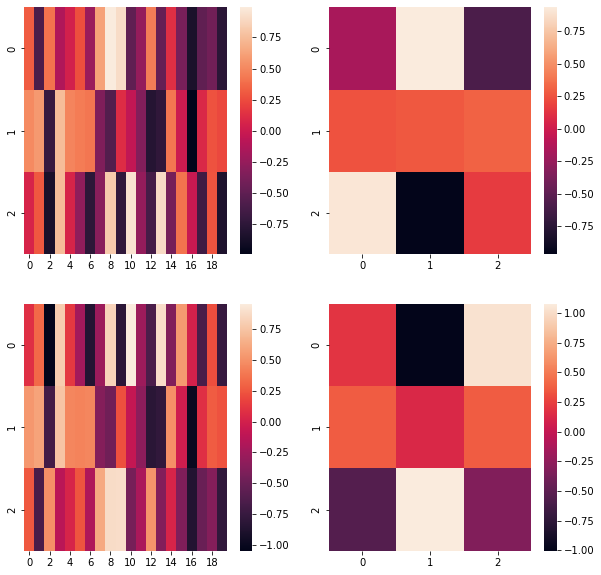

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(gen[0][0].W, ax=axes[0, 0])
sns.heatmap(train[0][0].VH, ax=axes[1, 0])
sns.heatmap(gen[0][0].W_acc, ax=axes[0, 1])
sns.heatmap(train[0][0].HH, ax=axes[1, 1])

In [43]:
rtrbm_test = train[0][0]

In [49]:
rtrbm_test.learn(lr=1e-4, mom=0, wc=0, batchsize=100)

TypeError: learn() got an unexpected keyword argument 'disable_tqdm'

<AxesSubplot:>

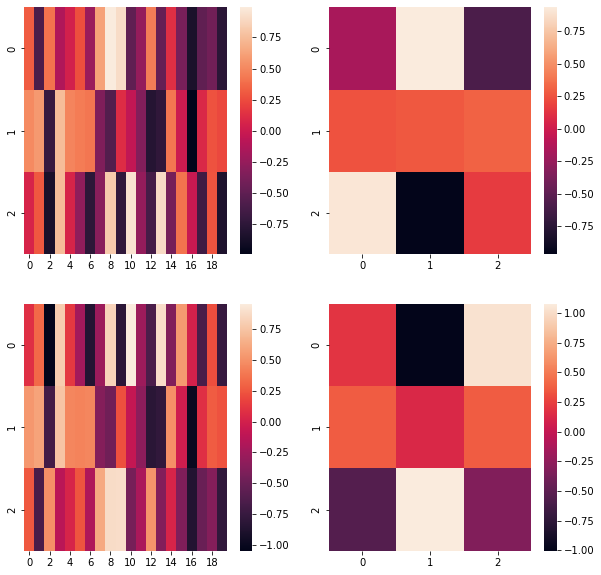

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(gen[0][0].W, ax=axes[0, 0])
sns.heatmap(rtrbm_test.VH, ax=axes[1, 0])
sns.heatmap(gen[0][0].W_acc, ax=axes[0, 1])
sns.heatmap(rtrbm_test.HH, ax=axes[1, 1])

In [51]:
rtrbm_newtest = RTRBM_nobias(rtrbm_test.V, N_H=3, device='cpu')
rtrbm_newtest.W = rtrbm_test.VH
rtrbm_newtest.learn(n_epochs=100, lr=1e-3, mom=0, wc=0)

100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


<AxesSubplot:>

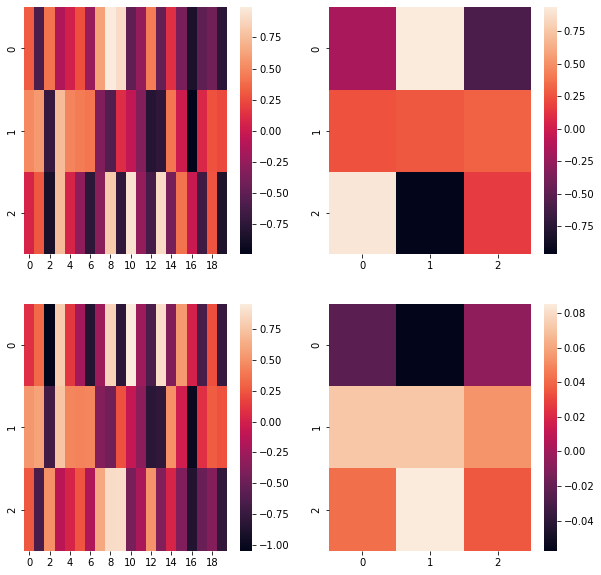

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(gen[0][0].W, ax=axes[0, 0])
sns.heatmap(rtrbm_newtest.W, ax=axes[1, 0])
sns.heatmap(gen[0][0].W_acc, ax=axes[0, 1])
sns.heatmap(rtrbm_newtest.U, ax=axes[1, 1])

In [60]:
rtrbm_newtest1 = RTRBM_nobias(rtrbm_test.V, N_H=3, device='cpu')
rtrbm_newtest1.learn(n_epochs=200, lr=1e-3, batchsize=100, mom=0, wc=0)

100%|██████████| 200/200 [07:10<00:00,  2.15s/it]


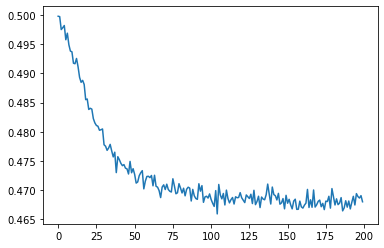

In [61]:
plt.plot(rtrbm_newtest1.errors)

<AxesSubplot:>

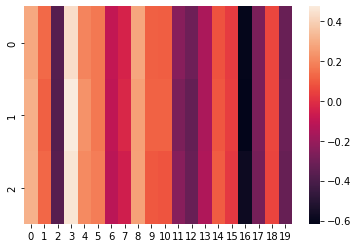

In [64]:
sns.heatmap(rtrbm_newtest1.W)

<AxesSubplot:>

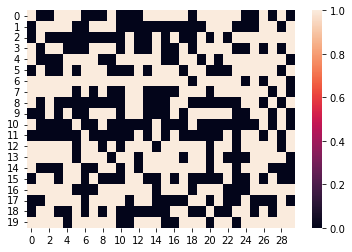

In [65]:
train = torch.load(open(r"D:\OneDrive\RU\Intern\rtrbm_master\results\Reproduce_rtrbm\rtrbm_list_batchsize2500epoch", "rb"))

data = train[2][0].V

sns.heatmap(data[:,:,0])

In [67]:
rtrbm17 = RTRBM_nobias(data, N_H=3, device='cpu')
rtrbm17.learn(n_epochs=1000, lr=1e-3, lr_end=1e-5, start_decay=200, batchsize=100, mom=0.9, wc=0.0002)
rtrbm17.learn(n_epochs=1000, lr=1e-3, lr_end=1e-5, start_decay=200, batchsize=100, mom=0.9, wc=0.0002)

100%|██████████| 1000/1000 [13:39<00:00,  1.22it/s]


<AxesSubplot:>

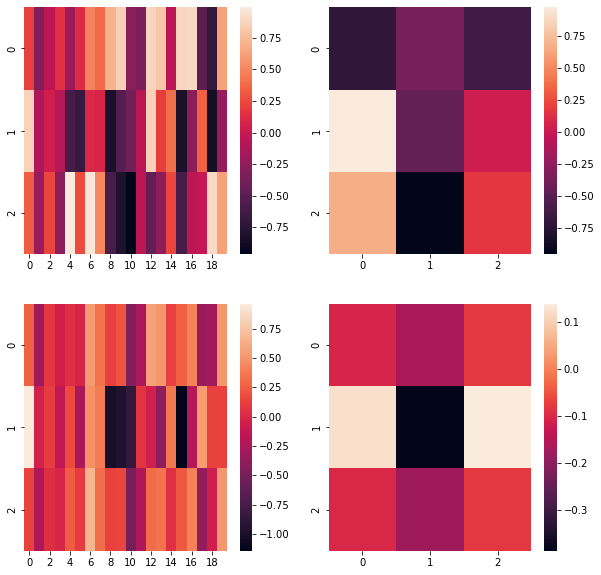

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(gen[2][0].W, ax=axes[0, 0])
sns.heatmap(rtrbm17.W, ax=axes[1, 0])
sns.heatmap(gen[2][0].W_acc, ax=axes[0, 1])
sns.heatmap(rtrbm17.U, ax=axes[1, 1])

In [69]:
rtrbm18 = RTRBM_nobias(data, N_H=3, device='cpu')
rtrbm18.learn(n_epochs=2000, lr=1e-3, lr_end=1e-5, start_decay=500, batchsize=100, mom=0.9, wc=0.0002)

100%|██████████| 2000/2000 [26:58<00:00,  1.24it/s]


<AxesSubplot:>

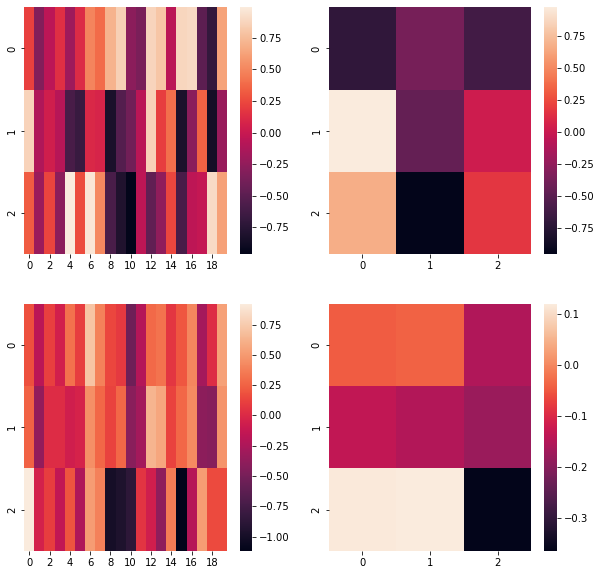

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(gen[2][0].W, ax=axes[0, 0])
sns.heatmap(rtrbm18.W, ax=axes[1, 0])
sns.heatmap(gen[2][0].W_acc, ax=axes[0, 1])
sns.heatmap(rtrbm18.U, ax=axes[1, 1])

<AxesSubplot:title={'center':'Reconstruction error of RTRBM during training'}, xlabel='epochs', ylabel='normalised reconstruction error'>

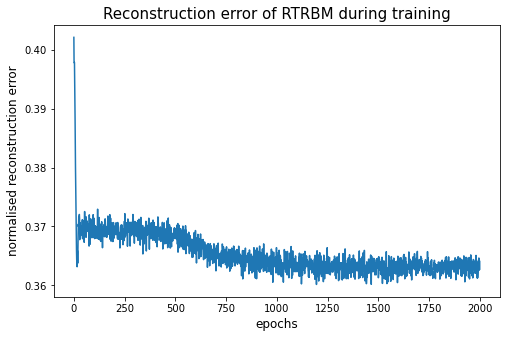

In [71]:
plot_reconstruction_error(rtrbm18.errors)